### Library 

In [12]:
import sys
import os
import datetime
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt

sys.path.append('/home/antorosi/Documents/AutoEncoder/')

#from load_shape_data import conso_ds_to_array, plot_conso_day
from CVAE.cvae import compile_cvae, run_cvae
from CVAE.cvae_model import CVAE

from conso.conso_helpers import plot_latent_space_projection, conso_ds_to_array, plot_conso_day

In [13]:
path_data_folder = "/local/home/antorosi/Documents/AutoEncoder/data"

### Import data

In [14]:
conso_csv = os.path.join(path_data_folder, "conso_Y.csv")
conso_df = pd.read_csv(conso_csv, sep=";", engine='c', header=0)
conso_df['ds'] = pd.to_datetime(conso_df['date'] + ' ' + conso_df['time'])

In [15]:
holiday_days_csv = os.path.join(path_data_folder, "joursFeries.csv")
holiday_days_df = pd.read_csv(holiday_days_csv, sep=";")
holiday_days_df.ds = pd.to_datetime(holiday_days_df.ds)
holiday_days_df['is_hd'] = 1

In [16]:
# get only national observation
Xinput_ds = conso_df[['ds', 'Consommation NAT t0']].copy()

######  Get input array

In [17]:
X, ds = conso_ds_to_array(Xinput_ds)

In [18]:
calendar_info = pd.DataFrame(ds)
calendar_info['month'] = calendar_info.ds.dt.month
calendar_info['weekday'] = calendar_info.ds.dt.weekday
calendar_info['is_weekday'] = (calendar_info.weekday < 5).apply(lambda x:int(x))
calendar_info = pd.merge(calendar_info, holiday_days_df[['ds', 'is_hd']], on='ds', how ='left')
calendar_info.loc[calendar_info['is_hd'].isna(),'is_hd'] = 0

###### Get conditional variables 

In [19]:
# month
one_hot_month = pd.get_dummies(calendar_info.month, prefix='month')
# weekday
one_hot_weekday = pd.get_dummies(calendar_info.is_weekday, prefix = 'weekday')

In [20]:
# Getting the conditional array
cond = pd.concat([one_hot_month, one_hot_weekday], axis=1)
cond = cond.as_matrix()

In [8]:
#cond = one_hot_month.as_matrix()

In [9]:
#cond = np.zeros((cond.shape[0],1))

######  Get train and test

In [21]:
X_train = X[:-365,:] 
cond_train = cond[:-365,:]
calendar_info_train = calendar_info[:-365]
X_test = X[-365:,:]
cond_test = cond[-365:,:]
calendar_info_test = calendar_info[-365:]
calendar_info_test = calendar_info_test.reset_index(drop=True)

In [22]:
cond_train.sum(axis=0)

array([ 124,  113,  124,  120,  124,  120,  124,  124,  120,  124,  120,
        128,  419, 1046], dtype=uint64)

###### Normalization

In [23]:
Min = X_train.min()
Max = X_train.max()

In [29]:
X_train = (X_train-Min)/(Max-Min)
X_test = (X_test-Min)/(Max-Min)

In [12]:
Mean = X_train.mean()
std = X_train.std()

In [13]:
X_train = (X_train-Mean)/(std)
X_test = (X_test-Mean)/(std)

In [14]:
X_train.shape

(1262, 96)

##### Saving data

In [15]:
dataset = {}

In [16]:
dataset['train'] = {'x': [X_train, cond_train], 'y': X_train}
dataset['test'] = {'x':  [X_test, cond_test], 'y': X_test}



### Building and Running model

In [17]:
output = '/home/antorosi/Documents/AutoEncoder/out'
name = 'cvae_conso_e24-12_d24-48_z2_norma-n_v03'
model = CVAE(cond_dim = 14, e_dims=[48,24], d_dims=[24,48], z_dim=2, name = name, output = output)

complete model: 
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_true (InputLayer)             (None, 96)           0                                            
__________________________________________________________________________________________________
cond (InputLayer)               (None, 14)           0                                            
__________________________________________________________________________________________________
encoder (Model)                 [(None, 2), (None, 2 6604        x_true[0][0]                     
                                                                 cond[0][0]                       
__________________________________________________________________________________________________
sample_z (Lambda)               (None, 2)            0           encoder[1][0]              



--- START TRAINING ---

Train on 1262 samples, validate on 365 samples
Epoch 1/200
1262/1262 [==============================] - 0s 216us/step - loss: 49.0785 - kl_loss: 6.0321 - recon_loss: 43.0464 - val_loss: 19.0978 - val_kl_loss: 6.4245 - val_recon_loss: 12.6733
Epoch 2/200
1262/1262 [==============================] - 0s 76us/step - loss: 11.8306 - kl_loss: 4.7879 - recon_loss: 7.0427 - val_loss: 10.9916 - val_kl_loss: 4.7869 - val_recon_loss: 6.2047
Epoch 3/200
1262/1262 [==============================] - 0s 75us/step - loss: 8.5011 - kl_loss: 3.7055 - recon_loss: 4.7956 - val_loss: 8.4247 - val_kl_loss: 3.5897 - val_recon_loss: 4.8350
Epoch 4/200
1262/1262 [==============================] - 0s 75us/step - loss: 7.4839 - kl_loss: 3.3785 - recon_loss: 4.1054 - val_loss: 8.1059 - val_kl_loss: 3.1585 - val_recon_loss: 4.9475
Epoch 5/200
1262/1262 [==============================] - 0s 78us/step - loss: 6.8003 - kl_loss: 3.1731 - recon_loss: 3.6272 - val_loss: 9.8678 - val_kl_loss: 2.

Epoch 86/200
1262/1262 [==============================] - 0s 78us/step - loss: 3.3235 - kl_loss: 1.5830 - recon_loss: 1.7405 - val_loss: 5.8441 - val_kl_loss: 1.8060 - val_recon_loss: 4.0381
Epoch 87/200
1262/1262 [==============================] - 0s 76us/step - loss: 3.3150 - kl_loss: 1.5742 - recon_loss: 1.7408 - val_loss: 5.0656 - val_kl_loss: 1.3981 - val_recon_loss: 3.6675
Epoch 88/200
1262/1262 [==============================] - 0s 80us/step - loss: 3.3281 - kl_loss: 1.5293 - recon_loss: 1.7987 - val_loss: 3.9043 - val_kl_loss: 1.6607 - val_recon_loss: 2.2436
Epoch 89/200
1262/1262 [==============================] - 0s 87us/step - loss: 3.2543 - kl_loss: 1.5385 - recon_loss: 1.7158 - val_loss: 3.6297 - val_kl_loss: 1.5762 - val_recon_loss: 2.0535
Epoch 90/200
1262/1262 [==============================] - 0s 74us/step - loss: 3.2756 - kl_loss: 1.5392 - recon_loss: 1.7363 - val_loss: 5.1714 - val_kl_loss: 1.4393 - val_recon_loss: 3.7321
Epoch 91/200
1262/1262 [=====================

Epoch 129/200
1262/1262 [==============================] - 0s 74us/step - loss: 3.1237 - kl_loss: 1.4437 - recon_loss: 1.6800 - val_loss: 4.9203 - val_kl_loss: 1.7837 - val_recon_loss: 3.1366
Epoch 130/200
1262/1262 [==============================] - 0s 74us/step - loss: 3.1523 - kl_loss: 1.4725 - recon_loss: 1.6798 - val_loss: 4.2381 - val_kl_loss: 1.5340 - val_recon_loss: 2.7041
Epoch 131/200
1262/1262 [==============================] - 0s 76us/step - loss: 3.1427 - kl_loss: 1.4601 - recon_loss: 1.6826 - val_loss: 4.5792 - val_kl_loss: 1.4450 - val_recon_loss: 3.1342
Epoch 132/200
1262/1262 [==============================] - 0s 75us/step - loss: 3.0935 - kl_loss: 1.4154 - recon_loss: 1.6781 - val_loss: 3.4944 - val_kl_loss: 1.4811 - val_recon_loss: 2.0133
Epoch 133/200
1262/1262 [==============================] - 0s 71us/step - loss: 3.2277 - kl_loss: 1.4895 - recon_loss: 1.7382 - val_loss: 4.0492 - val_kl_loss: 1.7733 - val_recon_loss: 2.2760
Epoch 134/200
1262/1262 [===============

Epoch 172/200
1262/1262 [==============================] - 0s 72us/step - loss: 3.0746 - kl_loss: 1.4040 - recon_loss: 1.6706 - val_loss: 3.6592 - val_kl_loss: 1.5765 - val_recon_loss: 2.0827
Epoch 173/200
1262/1262 [==============================] - 0s 77us/step - loss: 3.0616 - kl_loss: 1.3910 - recon_loss: 1.6706 - val_loss: 3.8526 - val_kl_loss: 1.5967 - val_recon_loss: 2.2558
Epoch 174/200
1262/1262 [==============================] - 0s 80us/step - loss: 3.0659 - kl_loss: 1.4303 - recon_loss: 1.6356 - val_loss: 3.6587 - val_kl_loss: 1.5136 - val_recon_loss: 2.1451
Epoch 175/200
1262/1262 [==============================] - 0s 77us/step - loss: 3.0417 - kl_loss: 1.4092 - recon_loss: 1.6325 - val_loss: 3.6209 - val_kl_loss: 1.3833 - val_recon_loss: 2.2376
Epoch 176/200
1262/1262 [==============================] - 0s 77us/step - loss: 3.0356 - kl_loss: 1.3832 - recon_loss: 1.6525 - val_loss: 3.4816 - val_kl_loss: 1.5986 - val_recon_loss: 1.8830
Epoch 177/200
1262/1262 [===============

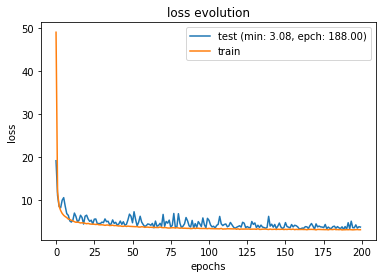

In [18]:
model.main_train(dataset, training_epochs=200, batch_size=20, verbose=True)

### Result analysis 

###### residuals  

In [47]:
z_hat = model.encoder.predict([X_test, cond_test])[0]
z_hat.shape

(365, 6)

In [79]:
cond_test.shape

(365, 14)

In [136]:
z_hat = model.encoder.predict([X_test, cond_test])[0]

X_hat = model.decoder.predict([z_hat, cond_test])

In [1]:
fig, axes = plt.subplots(10,7, figsize=(16,16))

ind = 150

for ax_row in axes:
    for ax in ax_row:
        # create a twin of the axis that shares the x-axis
        # plot some data on each axis.
        ax.plot(X_test[ind,:])
        ax.plot(X_hat[ind,:],'-r')
        
        ind+=1

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [138]:
residuals = (X_test - X_hat)
residuals_day = residuals.mean(axis=1)

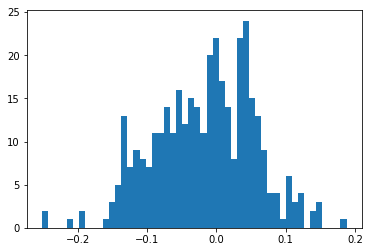

In [139]:
plt.hist(residuals_day, bins=50)
plt.show()

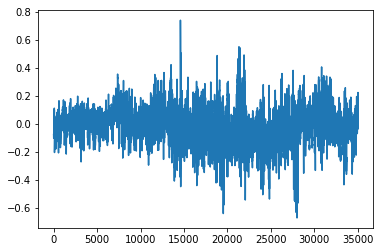

In [140]:
residuals = residuals.reshape(-1,1)
plt.plot(residuals)
plt.show()

###### Latent space projection 

In [19]:
x_encoded = model.encoder.predict([X_train, cond_train])[0]
calendar_info_plot = calendar_info_train

In [20]:
x_encoded.shape

(1262, 2)

In [123]:
from sklearn.manifold import TSNE

In [124]:
tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=300)
x_encoded_2D = tsne.fit_transform(x_encoded)

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1262 samples in 0.001s...
[t-SNE] Computed neighbors for 1262 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1262
[t-SNE] Computed conditional probabilities for sample 1262 / 1262
[t-SNE] Mean sigma: 0.064597
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.972454
[t-SNE] Error after 300 iterations: 0.711703


In [21]:
x_encoded_2D = x_encoded

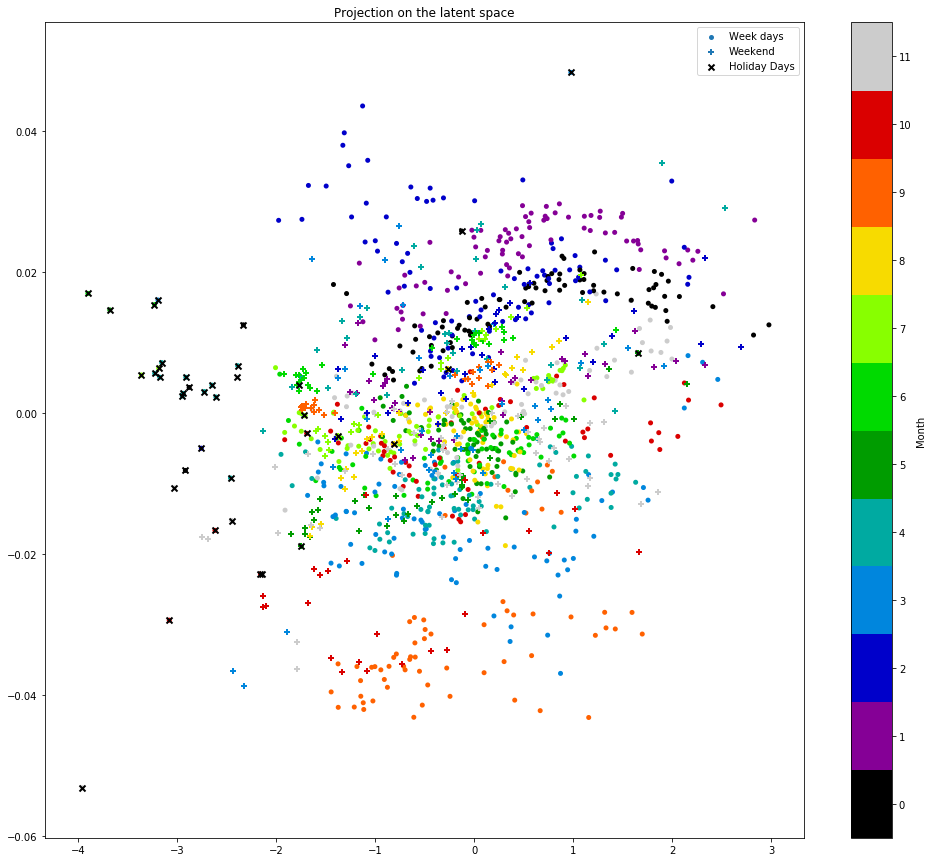

In [22]:
name_plot = 'latent_space_projection_train'
plot_latent_space_projection(x_proj=x_encoded_2D, calendar_info=calendar_info_plot,
                             path_folder_out=os.path.join(output,name,'results'), name=name_plot, 
                             pyplot=True, plotly = True)

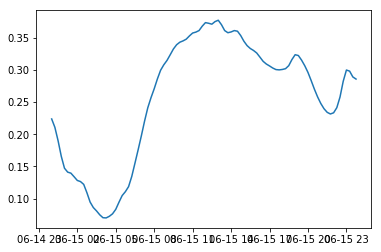

In [59]:
date = datetime.date(2015,6,15)
plot_conso_day(date,X_train,ds)